In [ ]:
# importing required packages
import torch
import torchvision
from  torchvision.datasets import ImageFolder 
from torchvision import transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 

In [ ]:
# mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.cuda.is_available()

True

In [ ]:
std=torch.Tensor([0.4687, 0.4667, 0.4540])
mean=torch.Tensor([0.2792, 0.2717, 0.2852])
# converting image size from 256X256 to 64X64
trans=transforms.Compose([transforms.Resize((64,64)),
                 transforms.ToTensor(),
                 transforms.Normalize(mean,std)])
# loading train, test and validation datasets (the dataset we choose was already split)
train_set = ImageFolder('drive/MyDrive/sport_classification_dataset1/train',transform=trans)
test_set = ImageFolder('drive/MyDrive/sport_classification_dataset1/test',transform=trans)
valid_set = ImageFolder('drive/MyDrive/sport_classification_dataset1/valid',transform=trans)

In [ ]:
print(len(train_set),len(test_set),len(valid_set))

1469 50 50


In [ ]:
# starting with batch size of 100 and 5 epochs
batch_size = 100
num_epochs = 5
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

73


In [ ]:
train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

In [ ]:
# creating model with 3 hidden layers initially
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

In [ ]:
# since we have out image size is 64X64 and in that there are different matrices for RGB, so we have input size of 3X64X64
input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [ ]:
# usefull for plotting graphs
import matplotlib.pyplot as plt

In [ ]:
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

# initializing loss function
criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

# knowing validation accuracy for every 50 iterations
    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

Iteration: 50. Loss: 2.0578222274780273. Accuracy: 22.0


In [ ]:
batch_size = 50
num_epochs = 10
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        out = self.relu6(out)
        out = self.fc7(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

293
Iteration: 50. Loss: 2.3067352771759033. Accuracy: 10.0
Iteration: 100. Loss: 2.2998950481414795. Accuracy: 10.0
Iteration: 150. Loss: 2.243558168411255. Accuracy: 10.0
Iteration: 200. Loss: 2.247860908508301. Accuracy: 10.0
Iteration: 250. Loss: 2.279083728790283. Accuracy: 16.0
Iteration: 300. Loss: 2.1771955490112305. Accuracy: 18.0


In [ ]:
batch_size = 40
num_epochs = 20
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, 200)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(200, hidden_dim)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden_dim, 200)
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(200, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        out = self.relu6(out)
        out = self.fc7(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

734
Iteration: 50. Loss: 2.267139196395874. Accuracy: 10.0
Iteration: 100. Loss: 2.279689073562622. Accuracy: 10.0
Iteration: 150. Loss: 2.2663140296936035. Accuracy: 10.0
Iteration: 200. Loss: 2.2434492111206055. Accuracy: 16.0
Iteration: 250. Loss: 2.04940128326416. Accuracy: 26.0
Iteration: 300. Loss: 2.015608549118042. Accuracy: 22.0
Iteration: 350. Loss: 1.7513786554336548. Accuracy: 24.0
Iteration: 400. Loss: 1.627170205116272. Accuracy: 34.0
Iteration: 450. Loss: 1.6412044763565063. Accuracy: 32.0
Iteration: 500. Loss: 1.436826467514038. Accuracy: 36.0
Iteration: 550. Loss: 1.7065613269805908. Accuracy: 28.0
Iteration: 600. Loss: 1.466832160949707. Accuracy: 38.0
Iteration: 650. Loss: 1.1817125082015991. Accuracy: 38.0
Iteration: 700. Loss: 1.1707648038864136. Accuracy: 32.0


In [ ]:
batch_size = 100
num_epochs = 20
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, 200)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(200, hidden_dim)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden_dim, 200)
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(200, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        out = self.relu6(out)
        out = self.fc7(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

293
Iteration: 50. Loss: 2.2842049598693848. Accuracy: 10.0
Iteration: 100. Loss: 2.286708116531372. Accuracy: 10.0
Iteration: 150. Loss: 2.2574362754821777. Accuracy: 10.0
Iteration: 200. Loss: 2.2832419872283936. Accuracy: 10.0
Iteration: 250. Loss: 2.2086548805236816. Accuracy: 14.0
Iteration: 300. Loss: 1.9935424327850342. Accuracy: 28.0


In [ ]:
batch_size = 50
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, 200)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(200, hidden_dim)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1175
Iteration: 50. Loss: 2.279017448425293. Accuracy: 12.0
Iteration: 100. Loss: 2.2283639907836914. Accuracy: 16.0
Iteration: 150. Loss: 2.131420373916626. Accuracy: 22.0
Iteration: 200. Loss: 1.9042823314666748. Accuracy: 24.0
Iteration: 250. Loss: 1.8128046989440918. Accuracy: 26.0
Iteration: 300. Loss: 1.6285358667373657. Accuracy: 22.0
Iteration: 350. Loss: 1.8080121278762817. Accuracy: 30.000001907348633
Iteration: 400. Loss: 1.3743094205856323. Accuracy: 34.0
Iteration: 450. Loss: 0.6510284543037415. Accuracy: 30.000001907348633
Iteration: 500. Loss: 1.288382887840271. Accuracy: 44.0
Iteration: 550. Loss: 0.9716654419898987. Accuracy: 34.0
Iteration: 600. Loss: 0.77704256772995. Accuracy: 44.0
Iteration: 650. Loss: 0.9721409678459167. Accuracy: 30.000001907348633
Iteration: 700. Loss: 0.5124871730804443. Accuracy: 38.0
Iteration: 750. Loss: 0.2446402758359909. Accuracy: 44.0
Iteration: 800. Loss: 0.5866252183914185. Accuracy: 46.0
Iteration: 850. Loss: 0.44283393025398254. Accu

In [ ]:
batch_size = 50
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, 200)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(200, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1175
Iteration: 50. Loss: 2.2000322341918945. Accuracy: 18.0
Iteration: 100. Loss: 1.867479681968689. Accuracy: 32.0
Iteration: 150. Loss: 1.8903658390045166. Accuracy: 28.0
Iteration: 200. Loss: 1.6716628074645996. Accuracy: 38.0
Iteration: 250. Loss: 1.4493179321289062. Accuracy: 46.0
Iteration: 300. Loss: 1.9127719402313232. Accuracy: 44.0
Iteration: 350. Loss: 1.0980397462844849. Accuracy: 42.0
Iteration: 400. Loss: 1.2789555788040161. Accuracy: 24.0
Iteration: 450. Loss: 0.59695965051651. Accuracy: 40.0
Iteration: 500. Loss: 1.0271754264831543. Accuracy: 42.0
Iteration: 550. Loss: 0.5452281832695007. Accuracy: 38.0
Iteration: 600. Loss: 1.150668978691101. Accuracy: 26.0
Iteration: 650. Loss: 0.9556069374084473. Accuracy: 38.0
Iteration: 700. Loss: 0.27090778946876526. Accuracy: 44.0
Iteration: 750. Loss: 0.6505671143531799. Accuracy: 44.0
Iteration: 800. Loss: 0.09451239556074142. Accuracy: 48.0
Iteration: 850. Loss: 0.7554338574409485. Accuracy: 44.0
Iteration: 900. Loss: 0.55171

In [ ]:
batch_size = 50
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 200)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(200, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1175
Iteration: 50. Loss: 1.9923063516616821. Accuracy: 30.000001907348633
Iteration: 100. Loss: 1.7629859447479248. Accuracy: 32.0
Iteration: 150. Loss: 1.4195728302001953. Accuracy: 30.000001907348633
Iteration: 200. Loss: 1.30316162109375. Accuracy: 38.0
Iteration: 250. Loss: 1.4138610363006592. Accuracy: 36.0
Iteration: 300. Loss: 0.9095069766044617. Accuracy: 40.0
Iteration: 350. Loss: 1.0285228490829468. Accuracy: 48.0
Iteration: 400. Loss: 1.1560724973678589. Accuracy: 28.0
Iteration: 450. Loss: 0.7311103940010071. Accuracy: 44.0
Iteration: 500. Loss: 0.2597009837627411. Accuracy: 46.0
Iteration: 550. Loss: 0.4061749279499054. Accuracy: 40.0
Iteration: 600. Loss: 0.2774984836578369. Accuracy: 48.0
Iteration: 650. Loss: 0.24441485106945038. Accuracy: 50.0
Iteration: 700. Loss: 0.08776521682739258. Accuracy: 52.0
Iteration: 750. Loss: 0.2788754105567932. Accuracy: 42.0
Iteration: 800. Loss: 0.03792131692171097. Accuracy: 46.0
Iteration: 850. Loss: 0.03898216784000397. Accuracy: 46

In [ ]:
batch_size = 30
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 300
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1958
Iteration: 50. Loss: 1.8259533643722534. Accuracy: 24.0
Iteration: 100. Loss: 1.5850088596343994. Accuracy: 28.0
Iteration: 150. Loss: 1.7444428205490112. Accuracy: 30.000001907348633
Iteration: 200. Loss: 1.3749098777770996. Accuracy: 36.0
Iteration: 250. Loss: 1.1019953489303589. Accuracy: 40.0
Iteration: 300. Loss: 1.1413151025772095. Accuracy: 34.0
Iteration: 350. Loss: 1.0524075031280518. Accuracy: 40.0
Iteration: 400. Loss: 1.0636788606643677. Accuracy: 42.0
Iteration: 450. Loss: 0.5885900855064392. Accuracy: 46.0
Iteration: 500. Loss: 0.38044920563697815. Accuracy: 52.0
Iteration: 550. Loss: 0.8531633615493774. Accuracy: 44.0
Iteration: 600. Loss: 0.6579021215438843. Accuracy: 40.0
Iteration: 650. Loss: 0.33856257796287537. Accuracy: 46.0
Iteration: 700. Loss: 0.2441520094871521. Accuracy: 44.0
Iteration: 750. Loss: 0.3661220669746399. Accuracy: 48.0
Iteration: 800. Loss: 0.45844167470932007. Accuracy: 42.0
Iteration: 850. Loss: 0.3992336094379425. Accuracy: 48.0
Iteration:

In [ ]:
batch_size = 50
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1175
Iteration: 50. Loss: 1.891524076461792. Accuracy: 26.0
Iteration: 100. Loss: 1.6368818283081055. Accuracy: 40.0
Iteration: 150. Loss: 1.3855739831924438. Accuracy: 34.0
Iteration: 200. Loss: 1.322893500328064. Accuracy: 34.0
Iteration: 250. Loss: 1.3688092231750488. Accuracy: 40.0
Iteration: 300. Loss: 0.9705392718315125. Accuracy: 44.0
Iteration: 350. Loss: 0.5433802604675293. Accuracy: 46.0
Iteration: 400. Loss: 0.6013947129249573. Accuracy: 46.0
Iteration: 450. Loss: 0.24186952412128448. Accuracy: 48.0
Iteration: 500. Loss: 0.5523784160614014. Accuracy: 34.0
Iteration: 550. Loss: 0.25948086380958557. Accuracy: 42.0
Iteration: 600. Loss: 0.3822629451751709. Accuracy: 42.0
Iteration: 650. Loss: 0.10765038430690765. Accuracy: 50.0
Iteration: 700. Loss: 0.08154672384262085. Accuracy: 50.0
Iteration: 750. Loss: 0.03270355239510536. Accuracy: 44.0
Iteration: 800. Loss: 0.007017950993031263. Accuracy: 50.0
Iteration: 850. Loss: 0.03112947940826416. Accuracy: 46.0
Iteration: 900. Loss:

In [ ]:
batch_size = 30
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1958
Iteration: 50. Loss: 1.9009844064712524. Accuracy: 32.0
Iteration: 100. Loss: 1.8885599374771118. Accuracy: 38.0
Iteration: 150. Loss: 1.716230869293213. Accuracy: 40.0
Iteration: 200. Loss: 1.1894174814224243. Accuracy: 48.0
Iteration: 250. Loss: 1.3285261392593384. Accuracy: 46.0
Iteration: 300. Loss: 1.3747601509094238. Accuracy: 42.0
Iteration: 350. Loss: 0.6577901840209961. Accuracy: 44.0
Iteration: 400. Loss: 1.0318926572799683. Accuracy: 38.0
Iteration: 450. Loss: 0.4508560299873352. Accuracy: 50.0
Iteration: 500. Loss: 1.4233688116073608. Accuracy: 34.0
Iteration: 550. Loss: 0.450373113155365. Accuracy: 46.0
Iteration: 600. Loss: 1.4094696044921875. Accuracy: 32.0
Iteration: 650. Loss: 0.5413162708282471. Accuracy: 50.0
Iteration: 700. Loss: 0.14590078592300415. Accuracy: 52.0
Iteration: 750. Loss: 0.11065806448459625. Accuracy: 50.0
Iteration: 800. Loss: 0.12573309242725372. Accuracy: 52.0
Iteration: 850. Loss: 0.4129583239555359. Accuracy: 44.0
Iteration: 900. Loss: 0.03

In [ ]:
batch_size = 30
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

input_dim = 3*64*64
hidden_dim = 500
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1958
Iteration: 50. Loss: 1.9152694940567017. Accuracy: 30.000001907348633
Iteration: 100. Loss: 1.6332231760025024. Accuracy: 42.0
Iteration: 150. Loss: 1.4361790418624878. Accuracy: 40.0
Iteration: 200. Loss: 1.2207415103912354. Accuracy: 52.0
Iteration: 250. Loss: 0.7736722230911255. Accuracy: 52.0
Iteration: 300. Loss: 1.223726749420166. Accuracy: 40.0
Iteration: 350. Loss: 2.067554235458374. Accuracy: 34.0
Iteration: 400. Loss: 0.9012098908424377. Accuracy: 40.0
Iteration: 450. Loss: 0.32574746012687683. Accuracy: 50.0
Iteration: 500. Loss: 0.6316187977790833. Accuracy: 48.0
Iteration: 550. Loss: 0.29757848381996155. Accuracy: 40.0
Iteration: 600. Loss: 0.2157553881406784. Accuracy: 52.0
Iteration: 650. Loss: 0.26583734154701233. Accuracy: 52.0
Iteration: 700. Loss: 0.023344675078988075. Accuracy: 50.0
Iteration: 750. Loss: 0.22650602459907532. Accuracy: 50.0
Iteration: 800. Loss: 0.3089957535266876. Accuracy: 44.0
Iteration: 850. Loss: 0.09598207473754883. Accuracy: 50.0
Iteratio

In [ ]:
batch_size = 30
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 700) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(700, 600)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(600, 500)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(500, output_dim)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1958
Iteration: 50. Loss: 2.029897928237915. Accuracy: 30.000001907348633
Iteration: 100. Loss: 1.7547271251678467. Accuracy: 26.0
Iteration: 150. Loss: 1.7750970125198364. Accuracy: 36.0
Iteration: 200. Loss: 1.1795482635498047. Accuracy: 44.0
Iteration: 250. Loss: 1.1653577089309692. Accuracy: 40.0
Iteration: 300. Loss: 1.5006519556045532. Accuracy: 40.0
Iteration: 350. Loss: 0.6963175535202026. Accuracy: 40.0
Iteration: 400. Loss: 1.130045771598816. Accuracy: 44.0
Iteration: 450. Loss: 0.7869428396224976. Accuracy: 36.0
Iteration: 500. Loss: 1.3847019672393799. Accuracy: 34.0
Iteration: 550. Loss: 0.45489656925201416. Accuracy: 44.0
Iteration: 600. Loss: 0.6697000861167908. Accuracy: 48.0
Iteration: 650. Loss: 0.6746096014976501. Accuracy: 38.0
Iteration: 700. Loss: 0.369083970785141. Accuracy: 38.0
Iteration: 750. Loss: 0.14396005868911743. Accuracy: 48.0
Iteration: 800. Loss: 0.19896671175956726. Accuracy: 46.0
Iteration: 850. Loss: 0.6576995253562927. Accuracy: 50.0
Iteration: 90

In [ ]:
batch_size = 32
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1836
Iteration: 50. Loss: 2.187873363494873. Accuracy: 18.0
Iteration: 100. Loss: 1.9850354194641113. Accuracy: 28.0
Iteration: 150. Loss: 1.7273809909820557. Accuracy: 34.0
Iteration: 200. Loss: 1.6021549701690674. Accuracy: 34.0
Iteration: 250. Loss: 1.6873085498809814. Accuracy: 28.0
Iteration: 300. Loss: 1.5185868740081787. Accuracy: 36.0
Iteration: 350. Loss: 1.7555500268936157. Accuracy: 34.0
Iteration: 400. Loss: 1.0084306001663208. Accuracy: 36.0
Iteration: 450. Loss: 1.1275328397750854. Accuracy: 36.0
Iteration: 500. Loss: 1.2755452394485474. Accuracy: 38.0
Iteration: 550. Loss: 0.7555225491523743. Accuracy: 42.0
Iteration: 600. Loss: 0.909960925579071. Accuracy: 42.0
Iteration: 650. Loss: 0.525795578956604. Accuracy: 46.0
Iteration: 700. Loss: 0.40331360697746277. Accuracy: 40.0
Iteration: 750. Loss: 0.6038928031921387. Accuracy: 46.0
Iteration: 800. Loss: 0.14340871572494507. Accuracy: 46.0
Iteration: 850. Loss: 0.21491868793964386. Accuracy: 46.0
Iteration: 900. Loss: 0.842

In [ ]:
batch_size = 32
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1836
Iteration: 50. Loss: 1.8910976648330688. Accuracy: 28.0
Iteration: 100. Loss: 1.1812041997909546. Accuracy: 42.0
Iteration: 150. Loss: 1.291098713874817. Accuracy: 46.0
Iteration: 200. Loss: 0.652342677116394. Accuracy: 36.0
Iteration: 250. Loss: 0.5263835191726685. Accuracy: 50.0
Iteration: 300. Loss: 0.2792690396308899. Accuracy: 48.0
Iteration: 350. Loss: 0.48397988080978394. Accuracy: 46.0
Iteration: 400. Loss: 0.5421964526176453. Accuracy: 44.0
Iteration: 450. Loss: 0.441554456949234. Accuracy: 42.0
Iteration: 500. Loss: 0.38329920172691345. Accuracy: 46.0
Iteration: 550. Loss: 0.5582122206687927. Accuracy: 50.0
Iteration: 600. Loss: 0.014886908233165741. Accuracy: 52.0
Iteration: 650. Loss: 0.17421117424964905. Accuracy: 48.0
Iteration: 700. Loss: 0.8308681845664978. Accuracy: 48.0
Iteration: 750. Loss: 0.03895102068781853. Accuracy: 44.0
Iteration: 800. Loss: 0.15770681202411652. Accuracy: 48.0
Iteration: 850. Loss: 0.007697513792663813. Accuracy: 44.0
Iteration: 900. Loss:

In [ ]:
batch_size = 32
num_epochs = 40
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

input_dim = 3*64*64
hidden_dim = 500
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1836
Iteration: 50. Loss: 1.4923837184906006. Accuracy: 30.000001907348633
Iteration: 100. Loss: 1.4230852127075195. Accuracy: 40.0
Iteration: 150. Loss: 1.1150026321411133. Accuracy: 46.0
Iteration: 200. Loss: 0.8489246964454651. Accuracy: 48.0
Iteration: 250. Loss: 0.3494953215122223. Accuracy: 46.0
Iteration: 300. Loss: 0.4517214000225067. Accuracy: 44.0
Iteration: 350. Loss: 0.670306921005249. Accuracy: 46.0
Iteration: 400. Loss: 0.20602236688137054. Accuracy: 48.0
Iteration: 450. Loss: 0.05093252286314964. Accuracy: 50.0
Iteration: 500. Loss: 0.0694054663181305. Accuracy: 46.0
Iteration: 550. Loss: 0.23744279146194458. Accuracy: 48.0
Iteration: 600. Loss: 0.12595519423484802. Accuracy: 52.0
Iteration: 650. Loss: 0.003899458795785904. Accuracy: 48.0
Iteration: 700. Loss: 0.06440221518278122. Accuracy: 44.0
Iteration: 750. Loss: 0.07192153483629227. Accuracy: 40.0
Iteration: 800. Loss: 0.025226997211575508. Accuracy: 50.0
Iteration: 850. Loss: 0.10282198339700699. Accuracy: 48.0
Ite

In [ ]:
batch_size = 16
num_epochs = 20
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
val_loader=DataLoader(valid_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)
test_loader=DataLoader(test_set,batch_size,shuffle=True,num_workers = 2,pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 400
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1836
Iteration: 50. Loss: 2.069836378097534. Accuracy: 36.0
Iteration: 100. Loss: 1.379429578781128. Accuracy: 32.0
Iteration: 150. Loss: 2.1403329372406006. Accuracy: 40.0
Iteration: 200. Loss: 1.35758376121521. Accuracy: 36.0
Iteration: 250. Loss: 1.722047209739685. Accuracy: 46.0
Iteration: 300. Loss: 1.464636206626892. Accuracy: 38.0
Iteration: 350. Loss: 1.1721956729888916. Accuracy: 34.0
Iteration: 400. Loss: 1.5001599788665771. Accuracy: 38.0
Iteration: 450. Loss: 0.8041134476661682. Accuracy: 42.0
Iteration: 500. Loss: 0.8018344044685364. Accuracy: 44.0
Iteration: 550. Loss: 0.9128082990646362. Accuracy: 40.0
Iteration: 600. Loss: 0.4659222960472107. Accuracy: 40.0
Iteration: 650. Loss: 0.4297313988208771. Accuracy: 42.0
Iteration: 700. Loss: 0.291352242231369. Accuracy: 50.0
Iteration: 750. Loss: 0.35150331258773804. Accuracy: 30.000001907348633
Iteration: 800. Loss: 0.41722962260246277. Accuracy: 40.0
Iteration: 850. Loss: 0.34772056341171265. Accuracy: 42.0
Iteration: 900. L

In [ ]:
# 1
batch_size = 64
num_epochs = 20
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 500
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

459
Iteration: 50. Loss: 1.3237497806549072. Accuracy: 38.0
Iteration: 100. Loss: 0.7890450358390808. Accuracy: 40.0
Iteration: 150. Loss: 0.40004655718803406. Accuracy: 42.0
Iteration: 200. Loss: 0.2926470637321472. Accuracy: 44.0
Iteration: 250. Loss: 0.4081924557685852. Accuracy: 42.0
Iteration: 300. Loss: 0.5231663584709167. Accuracy: 42.0
Iteration: 350. Loss: 0.07652110606431961. Accuracy: 42.0
Iteration: 400. Loss: 0.009093072265386581. Accuracy: 50.0
Iteration: 450. Loss: 0.06631121039390564. Accuracy: 36.0


In [ ]:
# 2
batch_size = 64
num_epochs = 50
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 600
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%50 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1147
Iteration: 50. Loss: 1.3930516242980957. Accuracy: 46.0
Iteration: 100. Loss: 0.8902257084846497. Accuracy: 44.0
Iteration: 150. Loss: 0.44102129340171814. Accuracy: 40.0
Iteration: 200. Loss: 0.18329447507858276. Accuracy: 48.0
Iteration: 250. Loss: 0.13264544308185577. Accuracy: 50.0
Iteration: 300. Loss: 0.21493883430957794. Accuracy: 52.0
Iteration: 350. Loss: 0.2691158056259155. Accuracy: 46.0
Iteration: 400. Loss: 0.22354616224765778. Accuracy: 48.0
Iteration: 450. Loss: 0.12986762821674347. Accuracy: 48.0
Iteration: 500. Loss: 0.07750906050205231. Accuracy: 40.0
Iteration: 550. Loss: 0.5549101829528809. Accuracy: 46.0
Iteration: 600. Loss: 0.034226685762405396. Accuracy: 44.0
Iteration: 650. Loss: 0.005503653548657894. Accuracy: 48.0
Iteration: 700. Loss: 0.002661790931597352. Accuracy: 48.0
Iteration: 750. Loss: 0.0008348121191374958. Accuracy: 46.0
Iteration: 800. Loss: 0.06622911244630814. Accuracy: 40.0
Iteration: 850. Loss: 0.004049147479236126. Accuracy: 44.0
Iteratio

In [ ]:
# 3
batch_size = 64
num_epochs = 60
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 600
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%100 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))

1377
Iteration: 100. Loss: 0.7738433480262756. Accuracy: 44.0
Iteration: 200. Loss: 0.25376540422439575. Accuracy: 34.0
Iteration: 300. Loss: 0.2026146501302719. Accuracy: 42.0
Iteration: 400. Loss: 0.09962094575166702. Accuracy: 46.0
Iteration: 500. Loss: 0.09961172193288803. Accuracy: 40.0
Iteration: 600. Loss: 0.02162395790219307. Accuracy: 44.0
Iteration: 700. Loss: 0.09333321452140808. Accuracy: 48.0
Iteration: 800. Loss: 0.0037978333421051502. Accuracy: 50.0
Iteration: 900. Loss: 0.02328726463019848. Accuracy: 34.0
Iteration: 1000. Loss: 0.15271547436714172. Accuracy: 46.0
Iteration: 1100. Loss: 0.05966511741280556. Accuracy: 48.0
Iteration: 1200. Loss: 0.0001632073544897139. Accuracy: 44.0
Iteration: 1300. Loss: 8.919271203922108e-05. Accuracy: 42.0


In [ ]:
# 4
batch_size = 64
num_epochs = 60
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 800
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it % 100 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100 * (correct/total)
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(it, loss.item(), accuracy))


1377
Iteration: 100. Loss: 0.6567630171775818. Accuracy: 50.0
Iteration: 200. Loss: 0.278903990983963. Accuracy: 56.0
Iteration: 300. Loss: 0.03274229168891907. Accuracy: 42.0
Iteration: 400. Loss: 0.2122727930545807. Accuracy: 46.0
Iteration: 500. Loss: 0.005870799534022808. Accuracy: 48.0
Iteration: 600. Loss: 0.013790585100650787. Accuracy: 46.0
Iteration: 700. Loss: 0.05928783491253853. Accuracy: 46.0
Iteration: 800. Loss: 0.0995604544878006. Accuracy: 42.0
Iteration: 900. Loss: 0.007491096388548613. Accuracy: 50.0
Iteration: 1000. Loss: 0.04247550666332245. Accuracy: 48.0
Iteration: 1100. Loss: 0.00010608852608129382. Accuracy: 48.0
Iteration: 1200. Loss: 4.1071336454479024e-05. Accuracy: 48.0
Iteration: 1300. Loss: 4.192708274786128e-06. Accuracy: 46.0


# Validation Loss graph for final model

1377


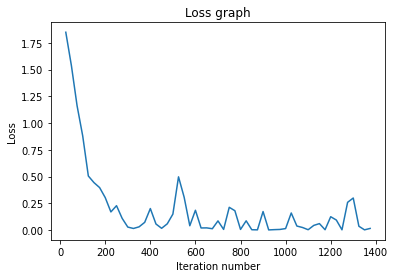

In [ ]:
batch_size = 64
num_epochs = 60
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 600
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

losses = []
iterations = []

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%25 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
      iterations.append(it)
      losses.append(loss.item())
      accuracy = 100 * (correct/total)

plt.plot(iterations,losses)
plt.xlabel('Iteration number')
plt.ylabel('Loss')
plt.title('Loss graph')
plt.show()

# Validation Accuracy graph for final model

1377


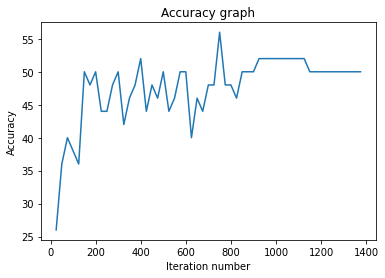

In [ ]:
batch_size = 64
num_epochs = 60
n_iters = int((len(train_set)/batch_size)*(num_epochs))
print(n_iters)

train_loader=DataLoader(train_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
val_loader=DataLoader(valid_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)
test_loader=DataLoader(test_set, batch_size, shuffle=True, num_workers = 2, pin_memory=True)

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

input_dim = 3*64*64
hidden_dim = 700
hidden_dim1 = 600
hidden_dim2 = 700
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()

#learning_rate = 0.1
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

accuracies = []
iterations = []

it = 0
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images = images.view(-1, 3*64*64).requires_grad_()
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    it += 1

    if it%25 == 0:
      correct = 0
      total = 0
      for images,labels in val_loader:
        images = images.view(-1,3*64*64).requires_grad_()
        outputs = model(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
      iterations.append(it)
      accuracy = 100 * (correct/total)
      accuracies.append(accuracy)

plt.plot(iterations,accuracies)
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy graph')
plt.show()

# Test Accuracy

In [ ]:
correct = 0
total = 0
for images,labels in test_loader:
  images = images.view(-1,3*64*64).requires_grad_()
  outputs = model(images)
  _, predicted = torch.max(outputs.data,1)
  total += labels.size(0)
  correct += (predicted == labels).sum()

print('Test Accuracy:', 100*(correct/total))

Test Accuracy: tensor(50.)


Confusion matrix, without normalization
[[1 0 2 0 0 0 0 0 0 0]
 [1 2 1 1 0 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 1 0 4 0 0 0 0 0]
 [0 0 1 2 1 4 2 0 1 0]
 [1 1 0 0 0 0 3 0 0 1]
 [1 0 0 0 0 0 0 4 2 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 0 0 0 0 1 4]]


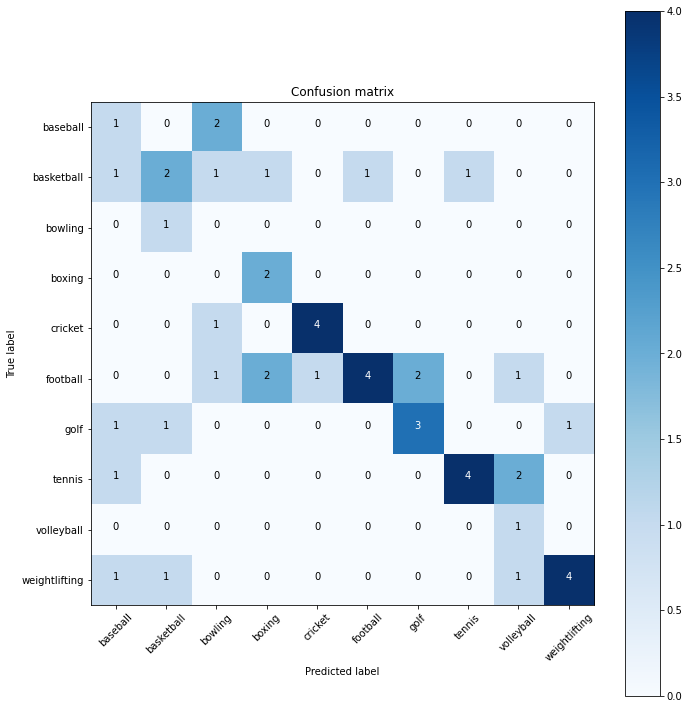

In [ ]:
from copy import deepcopy
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

tar = []
lbl = []
for images,labels in test_loader:
    images = images.view(-1, 3*64*64).requires_grad_()
    outputs = model(images)
    targets = []
    for i in range(outputs.shape[0]):
      cur_label = -1
      cur_probability = 0
      for j in range(outputs[i].shape[0]):
        if(outputs[i][j]>cur_probability):
          cur_probability = outputs[i][j]
          cur_label = j
      targets.append(cur_label)
    targets = torch.tensor(targets)
    if type(tar) == type([]):
      tar = deepcopy(targets)
    else:
      tar = torch.cat((tar,targets),0)
    if type(lbl) == type([]):
      lbl = deepcopy(labels)
    else:
      lbl = torch.cat((lbl,labels),0)

correct = 0
total = 0
for i in range(tar.shape[0]):
  if tar[i] == lbl[i]:
    correct += 1
  total += 1

cm = confusion_matrix(tar, lbl)

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,train_set.classes)

In [ ]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

In [ ]:
print('Recall:',recall)
print('Precision:',precision)

Recall: [0.33333333 0.28571429 0.         1.         0.8        0.36363636
 0.5        0.57142857 1.         0.57142857]
Precision: [0.2 0.4 0.  0.4 0.8 0.8 0.6 0.8 0.2 0.8]


In [ ]:
f1 = (2*np.mean(precision)*np.mean(recall))/(np.mean(precision) + np.mean(recall))
print('F1-score:',f1)

F1-score: 0.5204085869700619
